In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Now we need to read in the data
df = pd.read_csv('movies.csv')

In [3]:
# looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<Axes: >

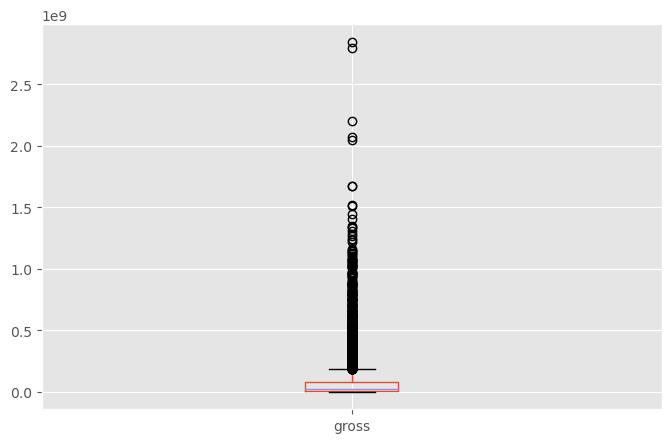

In [10]:
# Are there any Outliers?

plt.figure(figsize=(8,5))
df.boxplot(column=['gross'])

In [15]:
df=df.drop_duplicates()
df.shape

(7668, 15)

In [108]:
# Set pandas display options to show all columns,rows  and not to show values in scientific notation
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.float_format', '{:.2f}'.format)

In [21]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000.00,2847246203.00,Twentieth Century Fox,162.00
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.00,2797501328.00,Marvel Studios,181.00
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.00,2201647264.00,Twentieth Century Fox,194.00
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.00,2069521700.00,Lucasfilm,138.00
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.00,2048359754.00,Marvel Studios,149.00


<Axes: xlabel='gross', ylabel='budget'>

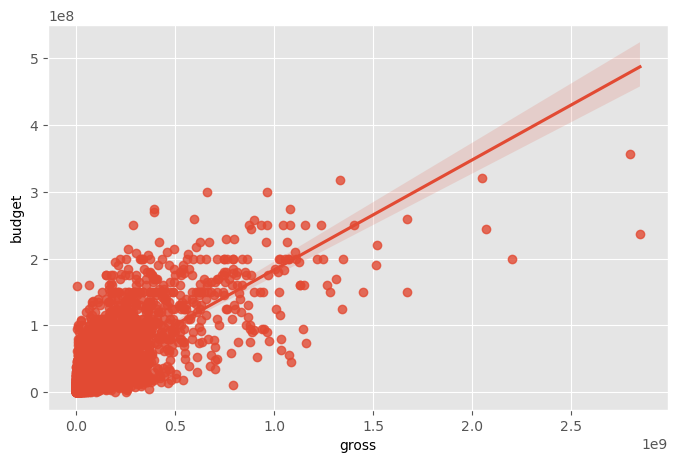

In [23]:
#showing relation of gross and budget
plt.figure(figsize=(8,5))
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

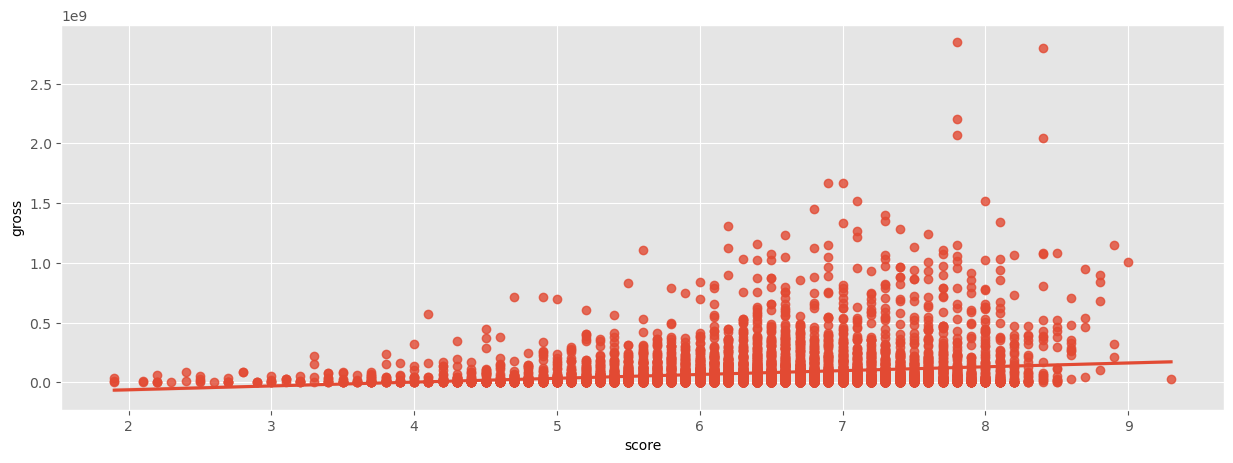

In [26]:
#showing relation of gross and score
plt.figure(figsize=(15,5))
sns.regplot(x="score", y="gross", data=df)

In [27]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

C:\Users\chris\AppData\Local\Temp\ipykernel_1116\2805906452.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson')


,year,score,votes,budget,gross,runtime
year,1.00,0.10,0.22,0.33,0.26,0.12
score,0.10,1.00,0.41,0.08,0.19,0.40
votes,0.22,0.41,1.00,0.44,0.63,0.31
budget,0.33,0.08,0.44,1.00,0.74,0.32
gross,0.26,0.19,0.63,0.74,1.00,0.25
runtime,0.12,0.40,0.31,0.32,0.25,1.00


In [28]:
df.corr(method ='kendall')

C:\Users\chris\AppData\Local\Temp\ipykernel_1116\1080062093.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='kendall')


,year,score,votes,budget,gross,runtime
year,1.00,0.07,0.33,0.22,0.20,0.10
score,0.07,1.00,0.30,-0.00,0.09,0.28
votes,0.33,0.30,1.00,0.35,0.55,0.20
budget,0.22,-0.00,0.35,1.00,0.51,0.24
gross,0.20,0.09,0.55,0.51,1.00,0.17
runtime,0.10,0.28,0.20,0.24,0.17,1.00


In [29]:
df.corr(method ='spearman')

C:\Users\chris\AppData\Local\Temp\ipykernel_1116\1164575377.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='spearman')


,year,score,votes,budget,gross,runtime
year,1.00,0.10,0.47,0.32,0.29,0.14
score,0.10,1.00,0.43,-0.00,0.13,0.40
votes,0.47,0.43,1.00,0.50,0.74,0.29
budget,0.32,-0.00,0.50,1.00,0.69,0.34
gross,0.29,0.13,0.74,0.69,1.00,0.25
runtime,0.14,0.40,0.29,0.34,0.25,1.00


C:\Users\chris\AppData\Local\Temp\ipykernel_1116\2308491421.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr() #default pearson


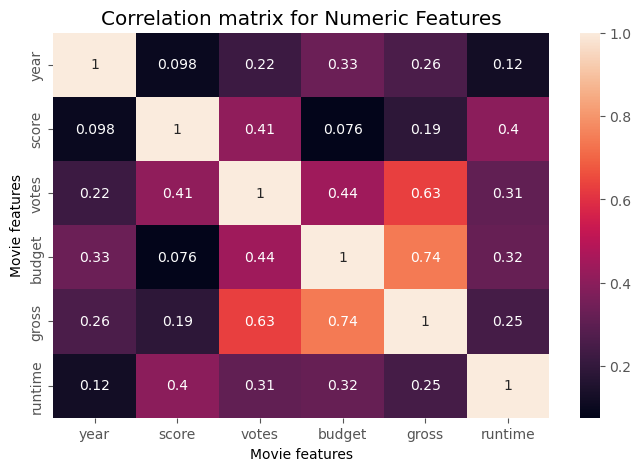

In [32]:
correlation_matrix = df.corr() #default pearson

plt.figure(figsize=(8,5))

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [38]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1
2,2,1,2,0,2,2,2,2,2,2,1,2,2,2,2
3,3,1,3,0,1,3,3,3,3,3,1,3,3,3,3
4,4,0,3,0,3,4,4,4,4,4,1,4,4,4,4


In [33]:
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.00,0.14,0.04,0.97,0.96,-0.05,0.29,0.75,0.81,0.73,0.14,0.28,0.95,0.59,0.05
rating,0.14,1.00,-0.09,0.16,0.15,0.01,0.10,0.09,0.10,0.09,0.00,0.19,0.16,-0.03,0.03
genre,0.04,-0.09,1.00,0.04,0.04,-0.00,0.02,0.05,0.03,0.04,-0.02,0.07,0.04,0.01,0.00
year,0.97,0.16,0.04,1.00,0.99,-0.04,0.31,0.77,0.82,0.76,0.14,0.30,0.98,0.60,0.05
released,0.96,0.15,0.04,0.99,1.00,-0.05,0.30,0.77,0.82,0.75,0.15,0.29,0.98,0.61,0.05
score,-0.05,0.01,-0.00,-0.04,-0.05,1.00,-0.01,-0.02,-0.03,-0.01,0.02,-0.01,-0.05,-0.03,0.03
votes,0.29,0.10,0.02,0.31,0.30,-0.01,1.00,0.19,0.22,0.18,-0.05,0.40,0.29,0.01,0.11
director,0.75,0.09,0.05,0.77,0.77,-0.02,0.19,1.00,0.75,0.68,0.16,0.11,0.75,0.55,-0.01
writer,0.81,0.10,0.03,0.82,0.82,-0.03,0.22,0.75,1.00,0.68,0.16,0.19,0.81,0.55,0.03
star,0.73,0.09,0.04,0.76,0.75,-0.01,0.18,0.68,0.68,1.00,0.18,0.11,0.74,0.53,0.04


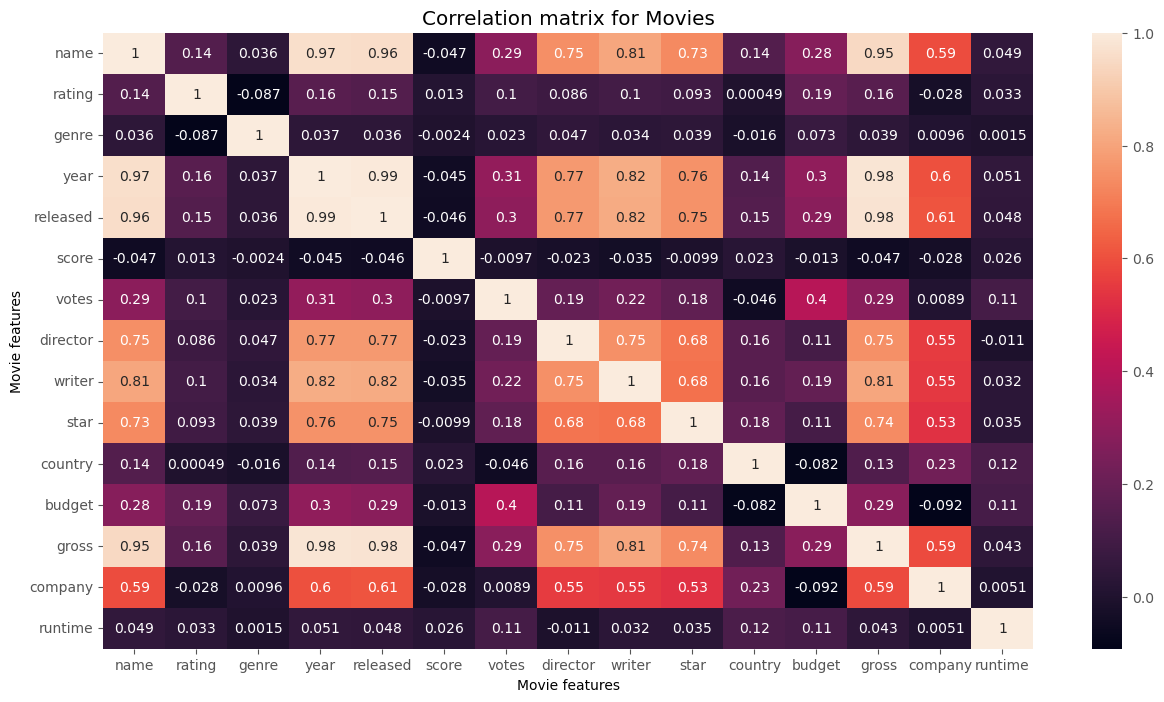

In [45]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

plt.figure(figsize=(15,8))

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [48]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

corr_pairs['name']

name        1.00
rating      0.14
genre       0.04
year        0.97
released    0.96
score      -0.05
votes       0.29
director    0.75
writer      0.81
star        0.73
country     0.14
budget      0.28
gross       0.95
company     0.59
runtime     0.05
dtype: float64

In [62]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[sorted_pairs > 0.5 ][sorted_pairs < 1 ]

print(strong_pairs)

year      released   0.99
released  year       0.99
gross     year       0.98
year      gross      0.98
gross     released   0.98
released  gross      0.98
year      name       0.97
name      year       0.97
released  name       0.96
name      released   0.96
          gross      0.95
gross     name       0.95
year      writer     0.82
writer    year       0.82
          released   0.82
released  writer     0.82
writer    gross      0.81
gross     writer     0.81
name      writer     0.81
writer    name       0.81
director  released   0.77
released  director   0.77
year      director   0.77
director  year       0.77
year      star       0.76
star      year       0.76
released  star       0.75
star      released   0.75
director  gross      0.75
gross     director   0.75
writer    director   0.75
director  writer     0.75
name      director   0.75
director  name       0.75
gross     star       0.74
star      gross      0.74
          name       0.73
name      star       0.73
director  st

In [66]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [105]:
df['Year'] = df['released'].str.split(',').str[1].str.strip().str[:4]
df.drop('year',axis=1,inplace=True)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00,1980


In [113]:
CompanyGrossSum = df.groupby(['company', 'Year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                Year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3168551343
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2019    2932757449
                       2006    2918469353
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
                       2005    2773019821
Name: gross, dtype: int64

In [116]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

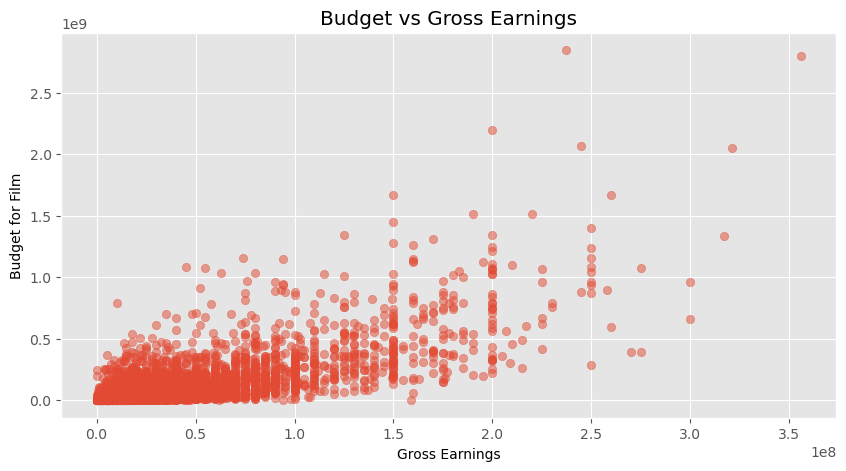

In [121]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [123]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,6587,6,6,1705,8.40,927000.00,2589,4014,1047,54,19000000.00,46998772.00,2319,146.00,0
1,5573,6,1,1492,5.80,65000.00,2269,1632,327,55,4500000.00,58853106.00,731,104.00,0
2,5142,4,0,1771,8.70,1200000.00,1111,2567,1745,55,18000000.00,538375067.00,1540,124.00,0
3,286,4,4,1492,7.70,221000.00,1301,2000,2246,55,3500000.00,83453539.00,1812,88.00,0
4,1027,6,4,1543,7.30,108000.00,1054,521,410,55,6000000.00,39846344.00,1777,98.00,0


In [124]:
df_numerized.corr(method='pearson')

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.00,-0.01,0.02,-0.01,0.02,0.01,0.01,0.01,0.01,-0.01,0.02,0.01,0.01,0.01,0.01
rating,-0.01,1.00,0.07,0.02,-0.00,0.03,0.02,-0.01,0.01,0.08,-0.18,-0.11,-0.03,0.06,0.00
genre,0.02,0.07,1.00,0.03,0.03,-0.15,-0.02,0.01,-0.01,-0.04,-0.36,-0.24,-0.07,-0.05,-0.08
released,-0.01,0.02,0.03,1.00,0.04,0.02,-0.00,-0.00,0.02,-0.02,0.01,0.00,-0.01,0.00,-0.00
score,0.02,-0.00,0.03,0.04,1.00,0.41,0.01,0.02,-0.00,-0.13,0.08,0.19,0.00,0.40,0.11
votes,0.01,0.03,-0.15,0.02,0.41,1.00,0.00,0.00,-0.02,0.07,0.44,0.63,0.13,0.31,0.22
director,0.01,0.02,-0.02,-0.00,0.01,0.00,1.00,0.30,0.04,0.02,-0.01,-0.01,0.00,0.02,-0.02
writer,0.01,-0.01,0.01,-0.00,0.02,0.00,0.30,1.00,0.03,0.02,-0.04,-0.02,0.01,-0.00,-0.01
star,0.01,0.01,-0.01,0.02,-0.00,-0.02,0.04,0.03,1.00,-0.01,-0.02,-0.00,0.01,0.01,-0.03
country,-0.01,0.08,-0.04,-0.02,-0.13,0.07,0.02,0.02,-0.01,1.00,0.05,0.09,0.10,-0.08,-0.07


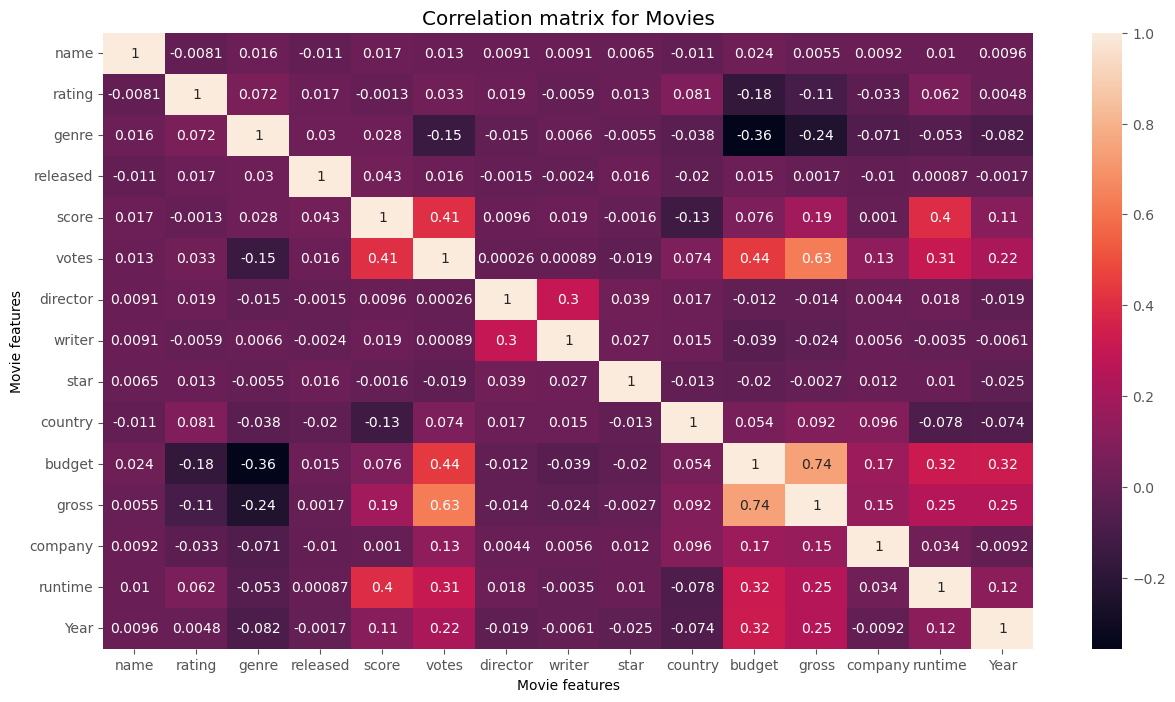

In [127]:
plt.figure(figsize=(15,8))

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()